## Fraud Detector - Dealing with Imbalanced Datasets

### Goals:
- Understand the provided data
- Determine the Classifiers we are going to use and decide which one has a higher precision, recall and f1 scores.
- Apply Random-Undersampling and SMOTE to the dataset in order to deal with the heavy class imbalance.

#### Understanding our data
- The description of the dataset says that all features went through a PCA (Dimensionality Reduction Technique) transformation, except for "Time" and "Amount", meaning all "V" features are already scaled (Since that is need in order to implement PCA).

In [1]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [3]:
print(f" No Frauds: {df["Class"].value_counts(normalize=True)[0] * 100:.2f} % of the dataset")
print(f" Frauds: {df["Class"].value_counts(normalize=True)[1] * 100:.2f} % of the dataset")

 No Frauds: 99.83 % of the dataset
 Frauds: 0.17 % of the dataset


Most of the transactions (99.83%) are non-fraud, meaning only 0.17% of the transactions are classified as fraud, making the dataset heavily imbalanced.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Correlation Matrices

Correlation Matrices can help us understand the features that heavily influence whether a specific transaction is classified a fraud. 
- We need to make sure we subsample our data in our correlation matrix or else it will be affected by the high imbalance between our classes.

In [5]:
from sklearn.preprocessing import RobustScaler

# Scale data

rob_scaler = RobustScaler()

new_df = df.copy()

new_df['scaled_amount'] = rob_scaler.fit_transform(new_df['Amount'].values.reshape(-1,1))
new_df['scaled_time'] = rob_scaler.fit_transform(new_df['Time'].values.reshape(-1,1))

new_df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = new_df['scaled_amount']
scaled_time = new_df['scaled_time']

new_df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
new_df.insert(0, 'scaled_amount', scaled_amount)
new_df.insert(1, 'scaled_time', scaled_time)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [6]:
# Subsampling

new_df = new_df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = new_df.loc[df['Class'] == 1]
non_fraud_df = new_df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
182315,0.279466,0.477625,2.155204,-1.685355,-0.238971,-1.456606,-1.882646,-0.403881,-1.610623,0.014436,...,-0.378984,0.121449,0.856472,0.139421,0.088568,-0.266809,-0.016361,0.036535,-0.046719,0
137705,-0.293440,-0.028231,-1.464897,1.975528,-1.077145,2.819191,0.069850,-0.789044,-1.196101,0.673654,...,0.048969,0.174099,-0.272505,-0.031549,-0.406166,0.157769,-0.104393,0.073796,-0.041570,1
52211,-0.097813,-0.462435,1.446076,-0.343731,-0.215368,-0.650234,-0.697091,-1.414191,-0.076443,-0.367909,...,0.020620,0.182248,0.421566,-0.156861,0.415153,0.768326,-0.082710,-0.034001,0.000614,0
11343,-0.293440,-0.762814,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,...,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1
44556,-0.293440,-0.501662,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,...,-0.249128,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1


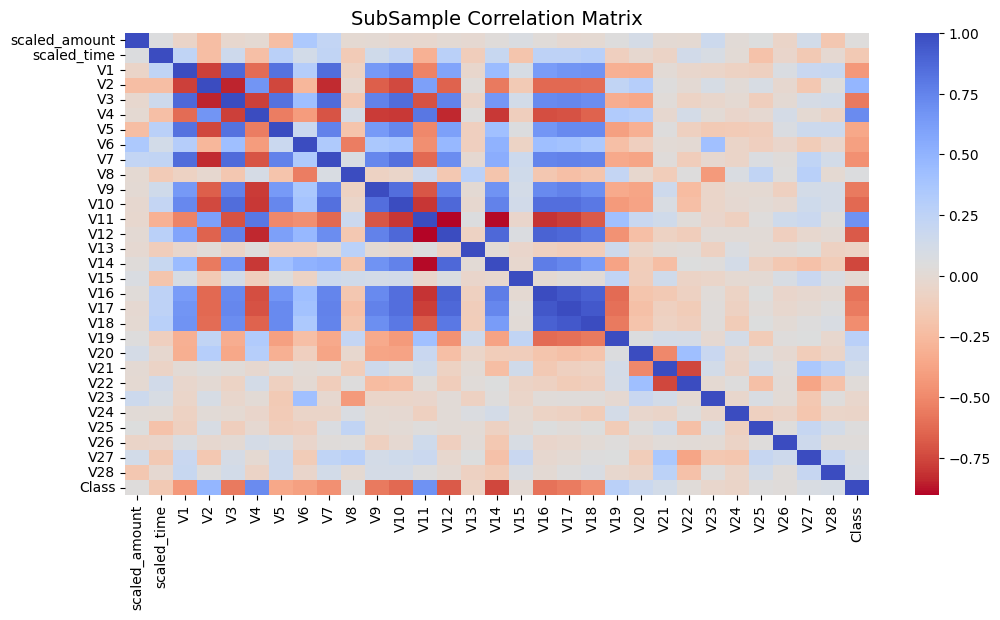

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
plt.figure(figsize=(12, 6)) 

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20},)
plt.title('SubSample Correlation Matrix', fontsize=14)
plt.show()

- **Negative Correlations:** V17, V14, V12 and V10 are negatively correlated, the lower these values are, the more likely the end result will be a fraud transaction.
- **Positive Correlations:** V2, V4, V11, and V19 are positively correlated, the higher these values are, the more likely the end result will be a fraud transaction.

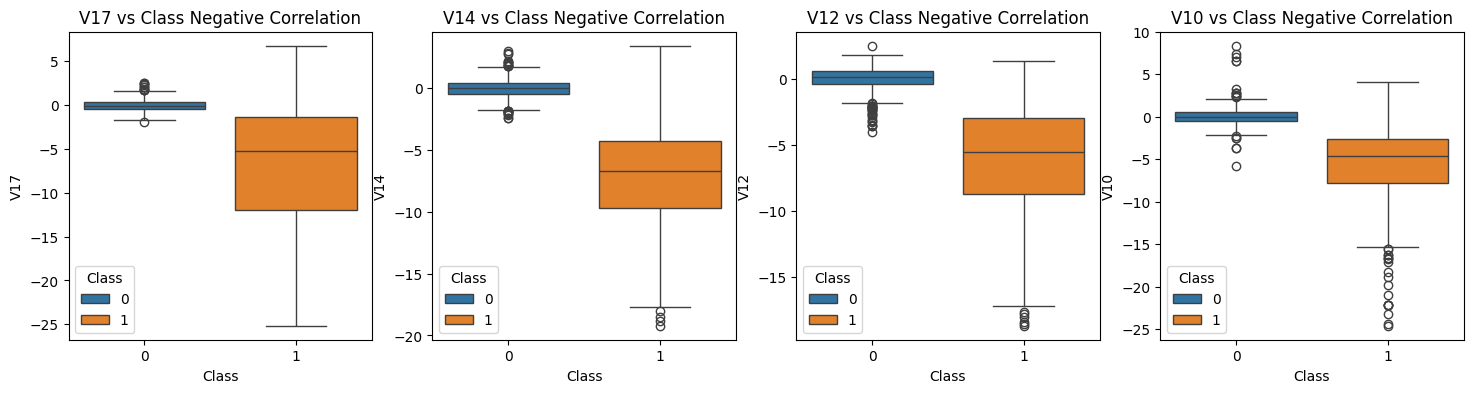

In [8]:
f, axes = plt.subplots(ncols=4, figsize=(18,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, hue="Class", ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, hue="Class", ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, hue="Class", ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, hue="Class", ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

### Anomaly Detection

Here we aim to reduce the "extreme outliers", from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.

#### Interquartile Range Method:
- To find outliers, we calculate the IQR, which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. We then set a threshold by adding/subtracting a number (like 1.5) multiplied by the IQR from Q3 and Q1. If a data point goes beyond this threshold, it’s considered an outlier and removed.
- Outlier Removal Tradeoff:
- If we set a low threshold (e.g., multiply IQR by 1.5), we’ll detect and remove more outliers. However, this might remove useful data, leading to information loss and lower model accuracy.
- If we set a high threshold (e.g., multiply IQR by 3), we’ll detect fewer outliers, focusing only on extreme ones. This helps avoid losing important information and keeps the model accurate.
- The goal is to find a balance: remove extreme outliers without losing too much useful data. You can experiment with different thresholds to see how they affect your model’s accuracy.

**NOTE:The code below as well as the code for plotting and analysing the correlation matrix was taken from Janio Martinez Bachmann's notebook on this dataset**

In [9]:
import numpy as np

# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[np.float64(-18.4937733551053), np.float64(-18.8220867423816), np.float64(-18.0499976898594), np.float64(-19.2143254902614)]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [np.float64(-18.4311310279993), np.float64(-18.5536970096458), np.float64(-18.0475965708216), np.float64(-18.6837146333443)]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lo

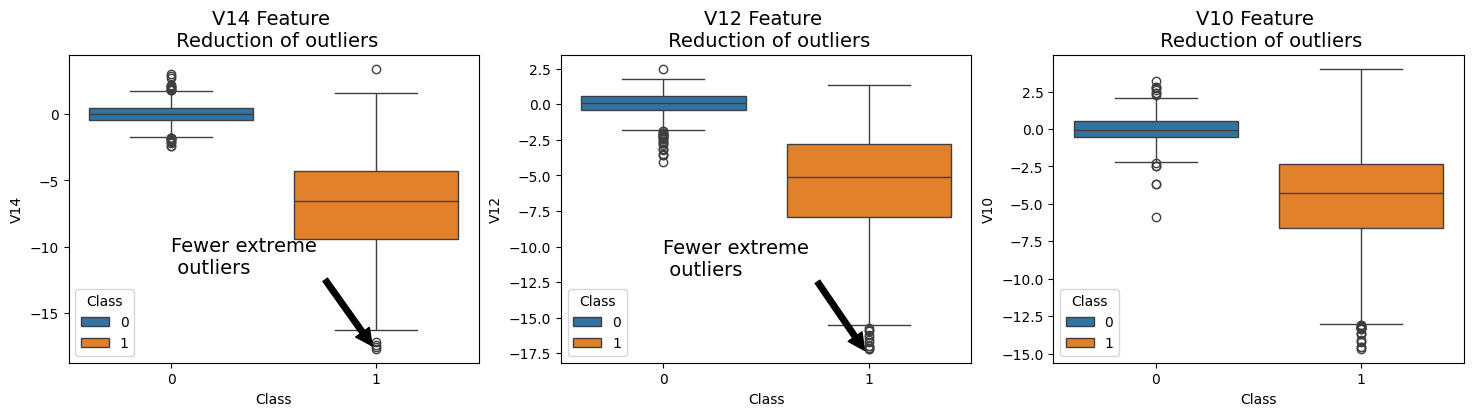

In [10]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, hue="Class")
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, hue="Class")
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, hue="Class")
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

### Data Leakage:

Even though we now have a better understanding of our data, we have made a crucial mistake that will cause **Data leakage**. 
- Data leakage occurs when information from outside the training dataset is used to create the model, leading to overly optimistic performance estimates.
- It is extremly important to split our data **before** scaling or subsampling to avoid data leakage.

In [11]:
def remove_outliers_iqr(df, columns, threshold=1.5):
    df_clean = df.copy()
    for col in columns:
        fraud_values = df_clean[col].loc[df_clean["Class"] == 1]
        q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
        iqr = q75 - q25
        cut_off = iqr * threshold
        lower, upper = q25 - cut_off, q75 + cut_off
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df = remove_outliers_iqr(df, columns=["V14", "V12", "V10"])

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="Class")
y = df["Class"]

#Split into train, val and test sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

### Random Undersampling
- Undersampling removes majority-class samples (non-fraud) to balance the dataset. The main issue with this is that our model might not be as accurate since we're losing a considerable amount of data(from 284,315 non-fraud to 492 non-fraud)
- We do **NOT** undersample test/validation sets, as they should reflect real-world class distribution.

In [13]:
from imblearn.under_sampling import RandomUnderSampler

rob_scaler = RobustScaler()

X_train[["Time", "Amount"]] = rob_scaler.fit_transform(X_train[["Time", "Amount"]])
X_val[["Time", "Amount"]] = rob_scaler.transform(X_val[["Time", "Amount"]])
X_test[["Time", "Amount"]] = rob_scaler.transform(X_test[["Time", "Amount"]])


undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print(f"Original Train Class Distributions: {y_train.value_counts()}")
print(f"Undersampled Train Class Distributions: {y_train_under.value_counts()}")

Original Train Class Distributions: Class
0    197786
1       320
Name: count, dtype: int64
Undersampled Train Class Distributions: Class
0    320
1    320
Name: count, dtype: int64


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Linear SVC": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(class_weight="balanced", n_jobs=2, random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(max_iter=1000, early_stopping=True, random_state=42)  
}

LogisticRegression scores:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     42383
           1       0.04      0.94      0.09        68

    accuracy                           0.97     42451
   macro avg       0.52      0.95      0.53     42451
weighted avg       1.00      0.97      0.98     42451

LogisticRegression PR-AUC:0.7194

SVC scores:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     42383
           1       0.04      0.94      0.08        68

    accuracy                           0.97     42451
   macro avg       0.52      0.95      0.53     42451
weighted avg       1.00      0.97      0.98     42451

SVC PR-AUC:0.7588

RandomForestClassifier scores:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42383
           1       0.06      0.94      0.11        68

    accuracy                           0.98     42451
   ma

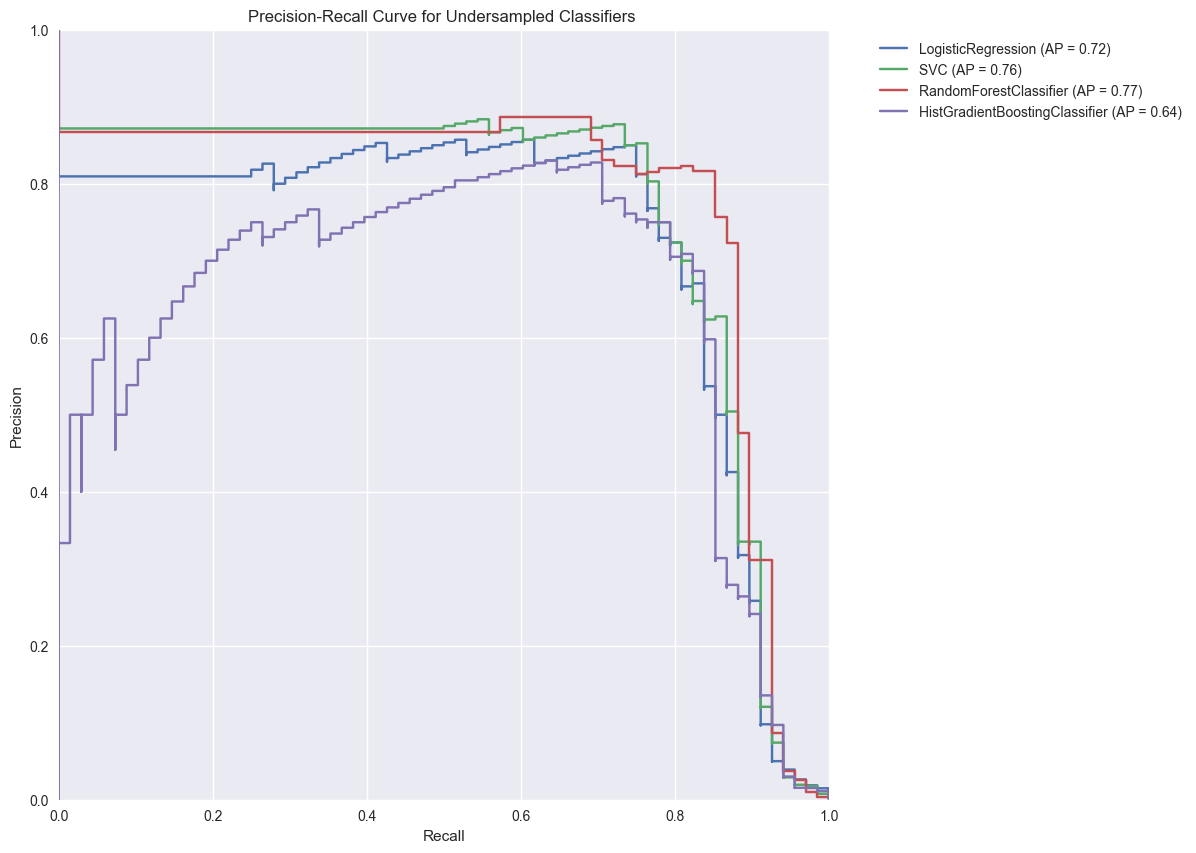

In [15]:
from sklearn.metrics import PrecisionRecallDisplay, classification_report, average_precision_score

plt.style.use("seaborn-v0_8")

plt.figure(figsize=(12,10))

for key, classifier in classifiers.items():
    
    classifier.fit(X_train_under, y_train_under)
    
    pred = classifier.predict(X_val)
    proba = classifier.predict_proba(X_val)[:, 1]
    print(f"{classifier.__class__.__name__} scores:\n"
          f"{classification_report(y_val, pred)}\n"
         f"{classifier.__class__.__name__} PR-AUC:{average_precision_score(y_val, proba):.4f}\n")  

    PrecisionRecallDisplay.from_estimator(
        classifier, X_val, y_val, ax=plt.gca(), marker="+", name=classifier.__class__.__name__
    )

plt.title("Precision-Recall Curve for Undersampled Classifiers ")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

- As expected our tree ensembles have a better average precision than our simpler classifiers(Logisitic Regression and Linear SVC).
- Undersampling helped but did not achieve a great result handling the class imbalance.

### SMOTE(Synthetic Minority Over-sampling Technique)
SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

Understanding SMOTE:

- Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
- Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
- Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
- Accuracy - Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

smote = SMOTE(sampling_strategy=0.1, random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [17]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=2)
rf_model.fit(X_train_res, y_train_res)

y_pred = rf_model.predict(X_val)
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))
print(f"PR-AUC: {average_precision_score(y_val, y_pred_proba):.4f}")

#y_pred_test= rf_model.predict(X_test)
#y_pred_proba_test = rf_model.predict_proba(X_test)[:, 1]
#print(f"PR-AUC Test: {average_precision_score(y_test, y_pred_proba_test):.4f}")

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     42383
       Fraud       0.92      0.85      0.89        68

    accuracy                           1.00     42451
   macro avg       0.96      0.93      0.94     42451
weighted avg       1.00      1.00      1.00     42451

PR-AUC: 0.8820


In [18]:
boost_smote =  HistGradientBoostingClassifier(max_iter=1000, early_stopping=True, random_state=42)
boost_smote.fit(X_train_res, y_train_res)

boost_smote_pred = boost_smote.predict(X_val)
boost_smote_pred_proba = boost_smote.predict_proba(X_val)[:, 1]

#boost_smote_pred_test = boost_smote.predict(X_test)
#boost_smote_pred_proba_test = boost_smote.predict_proba(X_test)[:, 1]

print(classification_report(y_val, boost_smote_pred, target_names=['Not Fraud', 'Fraud']))
print(f"PR-AUC: {average_precision_score(y_val, boost_smote_pred_proba):.4f}")
#print(f"PR-AUC Test: {average_precision_score(y_test, boost_smote_pred_proba_test):.4f}")

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     42383
       Fraud       0.85      0.84      0.84        68

    accuracy                           1.00     42451
   macro avg       0.93      0.92      0.92     42451
weighted avg       1.00      1.00      1.00     42451

PR-AUC: 0.8919


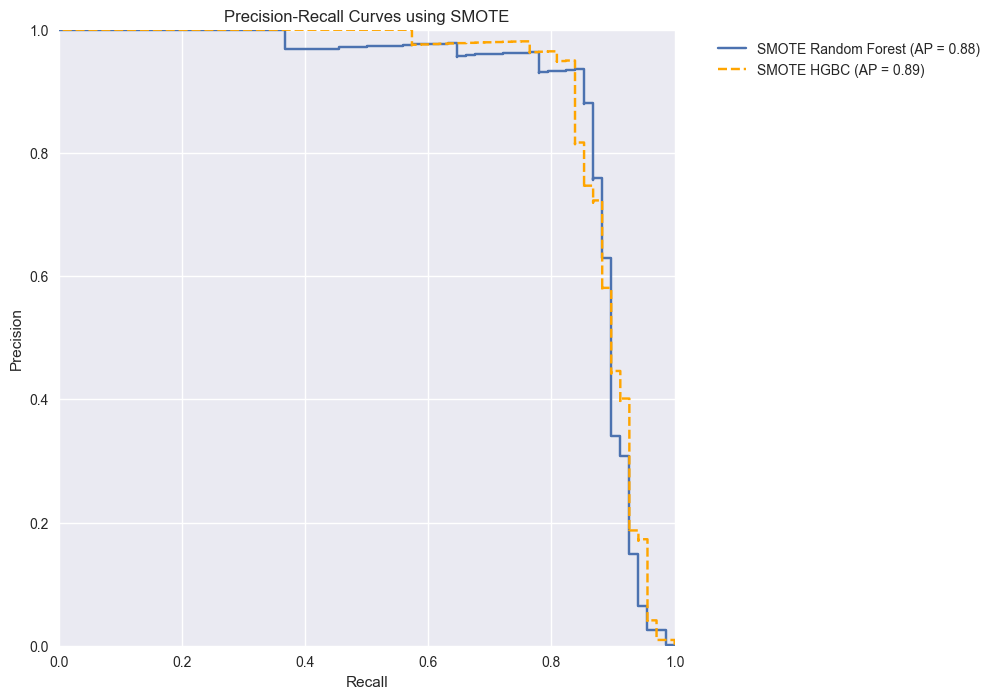

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))

disp1 = PrecisionRecallDisplay.from_estimator(
    rf_model, X_val, y_val, pos_label=1, marker="+", ax=ax, name="SMOTE Random Forest"
)

disp2 = PrecisionRecallDisplay.from_estimator(
    boost_smote, X_val, y_val, pos_label=1, marker="+", color="orange", linestyle="--", ax=ax, name="SMOTE HGBC"
)

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.set_title("Precision-Recall Curves using SMOTE")

plt.show()

Without any hyperparameter tuning, our Random Forest Classifier shows signs of overfitting because:
- It maintains a long plateau at Precision = 1.0, suggesting it makes highly confident predictions for certain instances.
- It has a sharp drop-off, indicating that when it misclassifies, it does so abruptly, which is a common sign of overfitting.

The HistGradientBoosting model has a slightly lower Average Precision (AP), but:
- Its PR curve is smoother and doesn’t have the same extreme plateau and drop-off.
- This suggests it might generalize better by not over-optimizing for the validation set and potentially performing better on unseen data.

The ROC-AUC curve can be misleading on highly imbalanced datasets because it remains relatively high even when the model performs poorly on the minority class. That's why I'm evaluating only the PR Curve. 

### Hyperparameter tuning

It is a good idea to concatenate our validation and test sets into a single test set for hyperparameter tuning since:
- Nested CV already handles validation internally.
- Larger test set can lead to a more reliable evaluation.

In [20]:
import numpy as np

X_test_full = np.concatenate([X_val, X_test])
y_test_full = np.concatenate([y_val, y_test])

X_test_full = pd.DataFrame(X_test_full, columns=X_train.columns)

In [21]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, average_precision_score
from scipy.stats import loguniform

#Hyperparemeter tuning for HGBC

inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

scoring = {
    "f1": make_scorer(f1_score, pos_label=1),
    "average_precision": make_scorer(average_precision_score, pos_label=1)
}

param_distributions = {
    "classifier__max_leaf_nodes": [2, 5, 10, 50, 100],
    "classifier__learning_rate": loguniform(0.01, 1)
}

pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("classifier", HistGradientBoostingClassifier(max_iter=300, early_stopping=True))
])

boost_random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, cv=inner_cv, n_iter=5, n_jobs=1)

cv_results = cross_validate(boost_random_search, X_train, y_train, cv=outer_cv, scoring=scoring, return_estimator=True, n_jobs=1)

test_f1 = cv_results["test_f1"]
test_ap = cv_results["test_average_precision"]

print(f"Tuned HGBC mean f1: {test_f1.mean():.3f}")
print(f"Tuned HGBC mean AP: {test_ap.mean():.3f}")

Tuned HGBC mean f1: 0.738
Tuned HGBC mean AP: 0.557


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, average_precision_score
from collections import Counter

#Extract best params

best_estimators = cv_results["estimator"]
best_params_list = [
   {k: tuple(v) if isinstance(v, list) else v for k, v in est.best_estimator_.get_params().items()}
   for est in best_estimators
]
best_params = Counter(tuple(sorted(p.items())) for p in best_params_list).most_common(1)[0][0]
best_params = dict(best_params)

classifier_params = {k.replace('classifier__', ''): v for k, v in best_params.items() 
                   if k.startswith('classifier__')}

In [26]:
final_smote = SMOTE(sampling_strategy=0.1, random_state=42)
x_train_smote, y_train_smote = final_smote.fit_resample(X_train, y_train)

final_boost_model = HistGradientBoostingClassifier(**classifier_params)
final_boost_model.fit(x_train_smote, y_train_smote)


HistGradientBoostingClassifier(early_stopping=True,
                               learning_rate=np.float64(0.014977629346237429),
                               max_iter=300, max_leaf_nodes=100)

In [27]:
train_pred = final_boost_model.predict(X_val)
train_pred_proba = final_boost_model.predict_proba(X_val)[:, 1]

final_boost_prediction = final_boost_model.predict(X_test_full)
final_boost_prediction_proba = final_boost_model.predict_proba(X_test_full)[:, 1]

print("=== Training Set Performance ===")
print(classification_report(y_val, train_pred, target_names=['Not Fraud', 'Fraud']))
print(f"PR-AUC (Train): {average_precision_score(y_val, train_pred_proba):.4f}")
print("="*50)

print("=== Test Set Performance ===")
print(classification_report(y_test_full, final_boost_prediction, target_names=['Not Fraud', 'Fraud']))
print(f"PR-AUC: {average_precision_score(y_test_full, final_boost_prediction_proba):.4f}")


=== Training Set Performance ===
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     42383
       Fraud       0.85      0.84      0.84        68

    accuracy                           1.00     42451
   macro avg       0.93      0.92      0.92     42451
weighted avg       1.00      1.00      1.00     42451

PR-AUC (Train): 0.7908
=== Test Set Performance ===
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     84766
       Fraud       0.81      0.82      0.82       137

    accuracy                           1.00     84903
   macro avg       0.91      0.91      0.91     84903
weighted avg       1.00      1.00      1.00     84903

PR-AUC: 0.7901


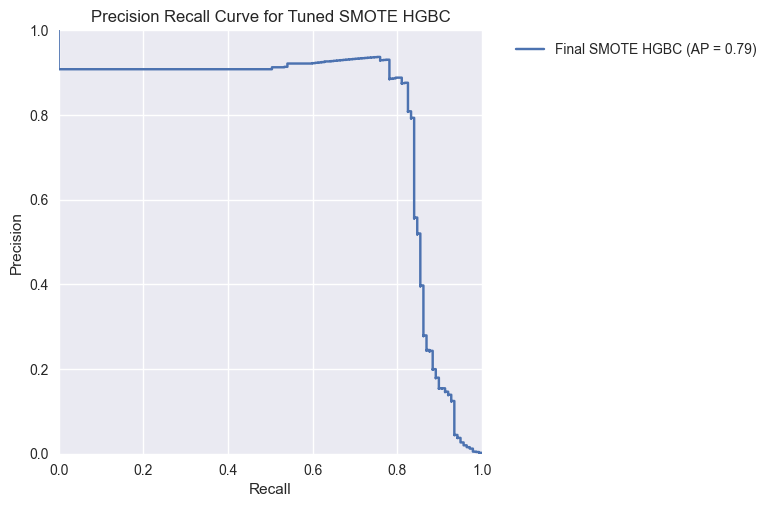

In [28]:
disp = PrecisionRecallDisplay.from_estimator(
    final_boost_model, X_test_full, y_test_full, pos_label=1, marker="+", name="Final SMOTE HGBC"
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Precision Recall Curve for Tuned SMOTE HGBC")

plt.show()



In [119]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, average_precision_score
from scipy.stats import loguniform

# Hyperparemeter tuning for Random Forest

inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

scoring = {
    "f1": make_scorer(f1_score, pos_label=1),
    "average_precision": make_scorer(average_precision_score, pos_label=1)
}

rf_param_distributions = {
    "classifier__max_leaf_nodes": [10, 100, 200, None],
    "classifier__max_features": [1, 2, 3, 5, None],
    "classifier__min_samples_leaf": [1, 5, 10, 50, 100]
}

forest_pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier())
])

forest_random_search = RandomizedSearchCV(forest_pipeline, param_distributions=rf_param_distributions, cv=inner_cv, n_iter=5, n_jobs=1)

cv_results = cross_validate(forest_random_search, X_train, y_train, cv=outer_cv, scoring=scoring, return_estimator=True, n_jobs=1)

rf_test_f1 = cv_results["test_f1"]
rf_test_ap = cv_results["test_average_precision"]

print(f"Tuned RF mean f1: {rf_test_f1.mean():.3f}")
print(f"Tuned RF mean AP: {rf_test_ap.mean():.3f}")

Tuned RF mean f1: 0.772
Tuned RF mean AP: 0.605


In [120]:
#Extract Random Forest best params 

best_estimators = cv_results["estimator"]
best_params_list = [
   {k: tuple(v) if isinstance(v, list) else v for k, v in est.best_estimator_.get_params().items()}
   for est in best_estimators
]
best_params = Counter(tuple(sorted(p.items())) for p in best_params_list).most_common(1)[0][0]
best_params = dict(best_params)

classifier_params = {k.replace('classifier__', ''): v for k, v in best_params.items() 
                   if k.startswith('classifier__')}

In [122]:
final_rf_model = RandomForestClassifier(**classifier_params)
final_rf_model.fit(x_train_smote, y_train_smote)

RandomForestClassifier(max_features=3, max_leaf_nodes=200, min_samples_leaf=5)

In [124]:
rf_train_pred = final_rf_model.predict(X_val)
rf_train_pred_proba = final_rf_model.predict_proba(X_val)[:,1]

final_rf_pred = final_rf_model.predict(X_test_full)
final_rf_pred_proba = final_rf_model.predict_proba(X_test_full)[:, 1]

print("=== Training Set Performance ===")
print(classification_report(y_val, rf_train_pred , target_names=['Not Fraud', 'Fraud']))
print(f"PR-AUC (Train): {average_precision_score(y_val, rf_train_pred_proba):.4f}")
print("="*50)

print("=== Test Set Performance ===")
print(classification_report(y_test_full, final_rf_pred , target_names=['Not Fraud', 'Fraud']))
print(f"PR-AUC: {average_precision_score(y_test_full, final_rf_pred_proba):.4f}")

=== Training Set Performance ===
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     42647
       Fraud       0.56      0.84      0.67        74

    accuracy                           1.00     42721
   macro avg       0.78      0.92      0.84     42721
weighted avg       1.00      1.00      1.00     42721

PR-AUC (Train): 0.5997
=== Test Set Performance ===
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85295
       Fraud       0.58      0.84      0.69       148

    accuracy                           1.00     85443
   macro avg       0.79      0.92      0.84     85443
weighted avg       1.00      1.00      1.00     85443

PR-AUC: 0.6454


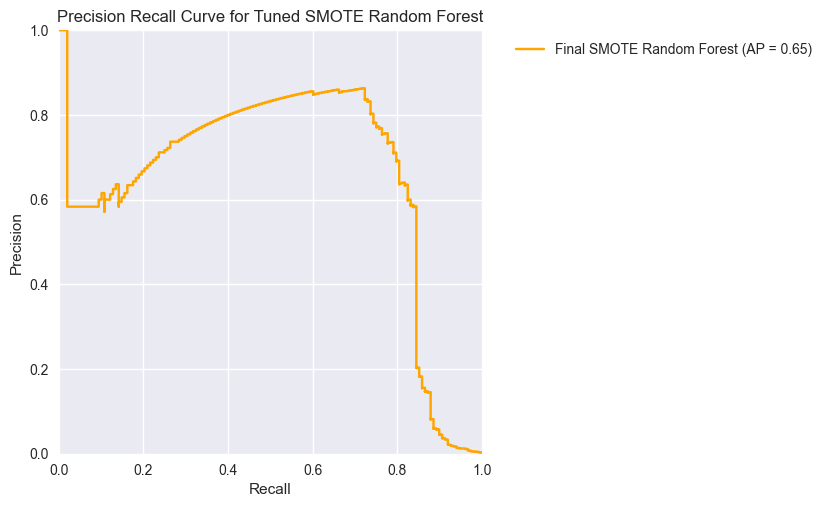

In [125]:
disp = PrecisionRecallDisplay.from_estimator(
    final_rf_model, X_test_full, y_test_full, pos_label=1, marker="+", name="Final SMOTE Random Forest", color="orange"
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Precision Recall Curve for Tuned SMOTE Random Forest")

plt.show()

Current hyperparemeter choices for the Random Forest Classifier might have caused it to underfit. While the hyperparemeter tuning has substantially improved the HistGradientBoostingClassifier scores.